In [234]:
import sys
sys.path.append("../..")

import numpy as np
import matplotlib.pyplot as plt
from tqdm import *
from scipy.integrate import nquad
from scipy.interpolate import interp1d
from scipy.special import erf
import matplotlib as mpl
import matplotlib.pylab as pylab
from cycler import cycler
import palettable
from matplotlib.animation import FuncAnimation

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

from matplotlib import animation, rc
from IPython.display import HTML

from theory.units import *
from theory.spec_calc import PowerSpectra
from simulation.demo_sim import DemoSim

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [302]:
params = {'text.usetex': True,
          'font.family': 'serif',
          'font.serif': ['CMU Serif'],
          'font.sans-serif': ['CMU Sans Serif'],
          'legend.fontsize': 17,
          'legend.fancybox': True,
          'legend.frameon': False,
          'legend.framealpha': 0.4,
          'legend.labelspacing': 0.5,
          'figure.figsize': (6.4/1.1, 4.8/1.1),
          'axes.labelsize': 19,
          'axes.titlesize':18,
          'axes.titlepad':10,
          'axes.linewidth':1.1,
          'axes.labelpad':10,
          'axes.prop_cycle': cycler('color', palettable.cartocolors.qualitative.Bold_10.hex_colors) + 
                            cycler(alpha=10*[.7]), 
          'lines.linewidth':2.5,
          'xtick.labelsize':18,
          'ytick.labelsize':18,
          'xtick.top':True,
          'ytick.right':True,
          'xtick.direction': 'in',
          'ytick.direction': 'in',
          'xtick.major.size': 5,
          'xtick.minor.size': 2,
          'ytick.major.size': 5,
          'ytick.minor.size': 2,
          'xtick.major.width': 1,
          'ytick.major.width': 1,
          'xtick.minor.width': 0.8,
          'ytick.minor.width': 0.8,
         }
pylab.rcParams.update(params)

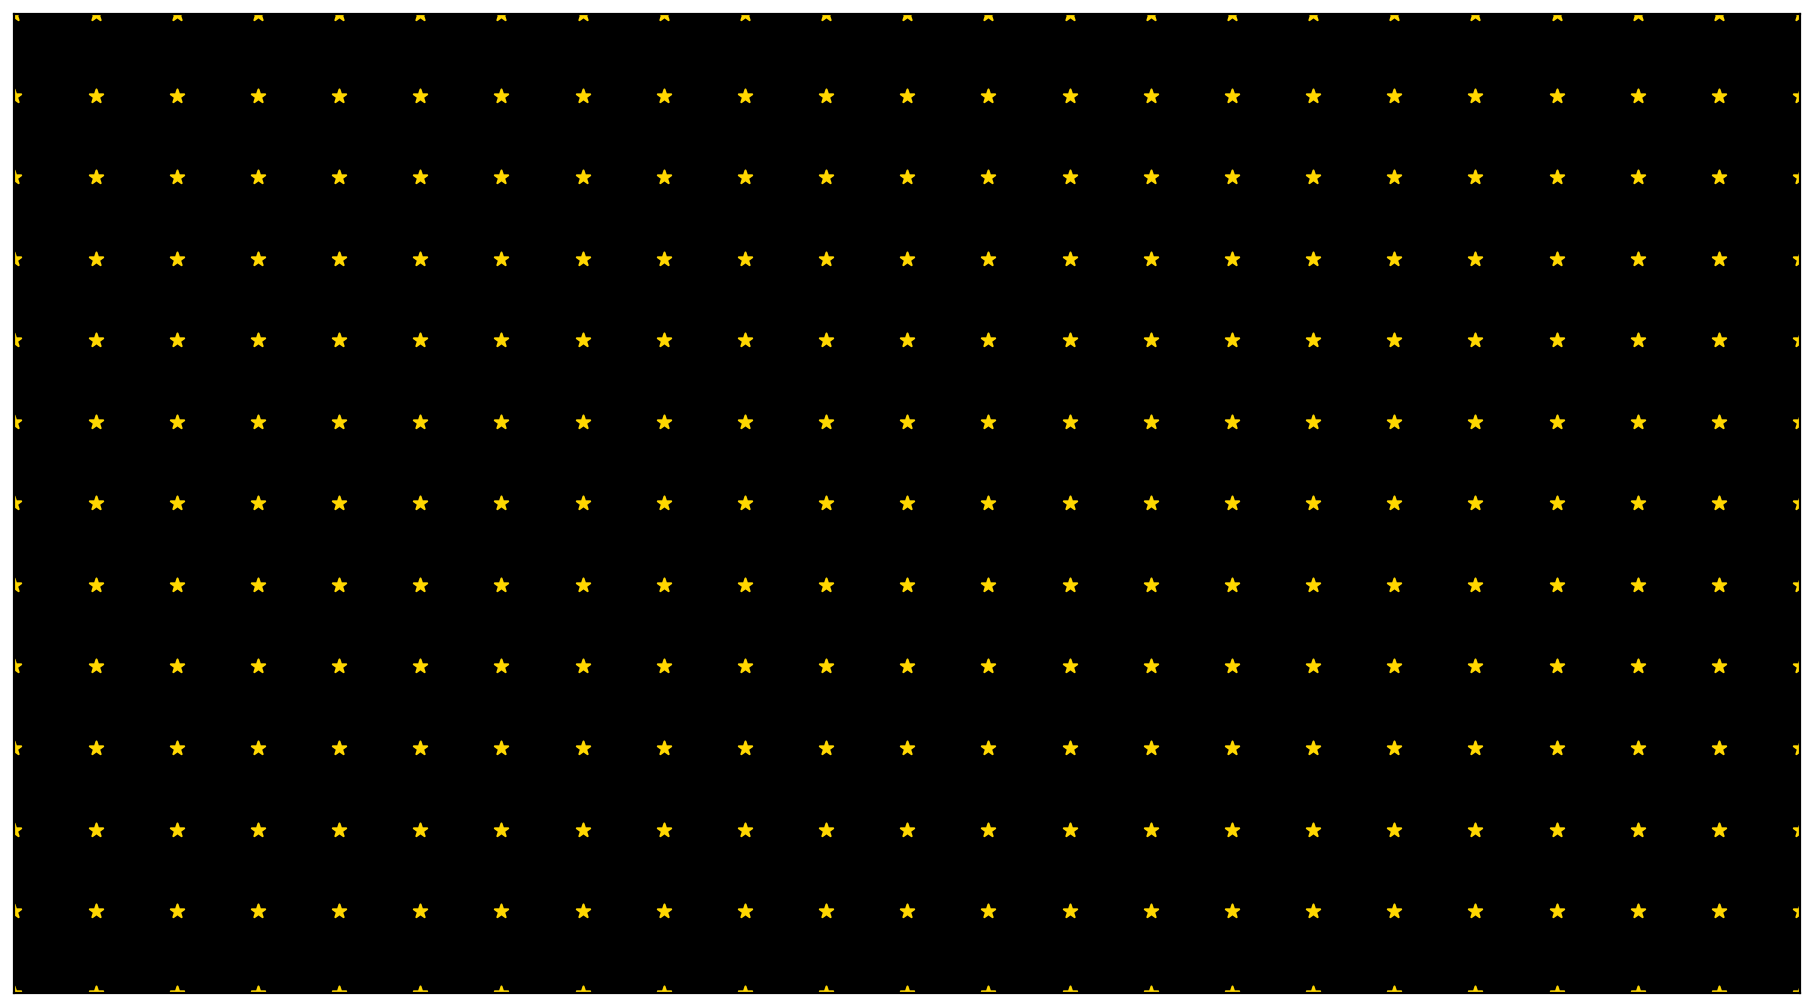

In [443]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9] ,
            n_dens = 50,
            source_pos="uniform"
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'gold','s':50}


anim = ds.animation(dt=10, 
                    pos_l=np.array([[-.8,0],[.5,.5]]), v_l=np.array([[50,0],[50,-100]]) * Kmps, R_l=[0.1 * pc, 0.05 *pc], M_l=[5e5 * M_s, 1e5 * M_s],
                    D_l=100 * kpc, frames=500, mult=2000, animate=False, show_lens=False, show_vel_arrows=False, show_orig=True,
                   n_x=500, n_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs)
# HTML(anim.to_html5_video())
plt.savefig("/Users/smsharma/Desktop/uniform.pdf")


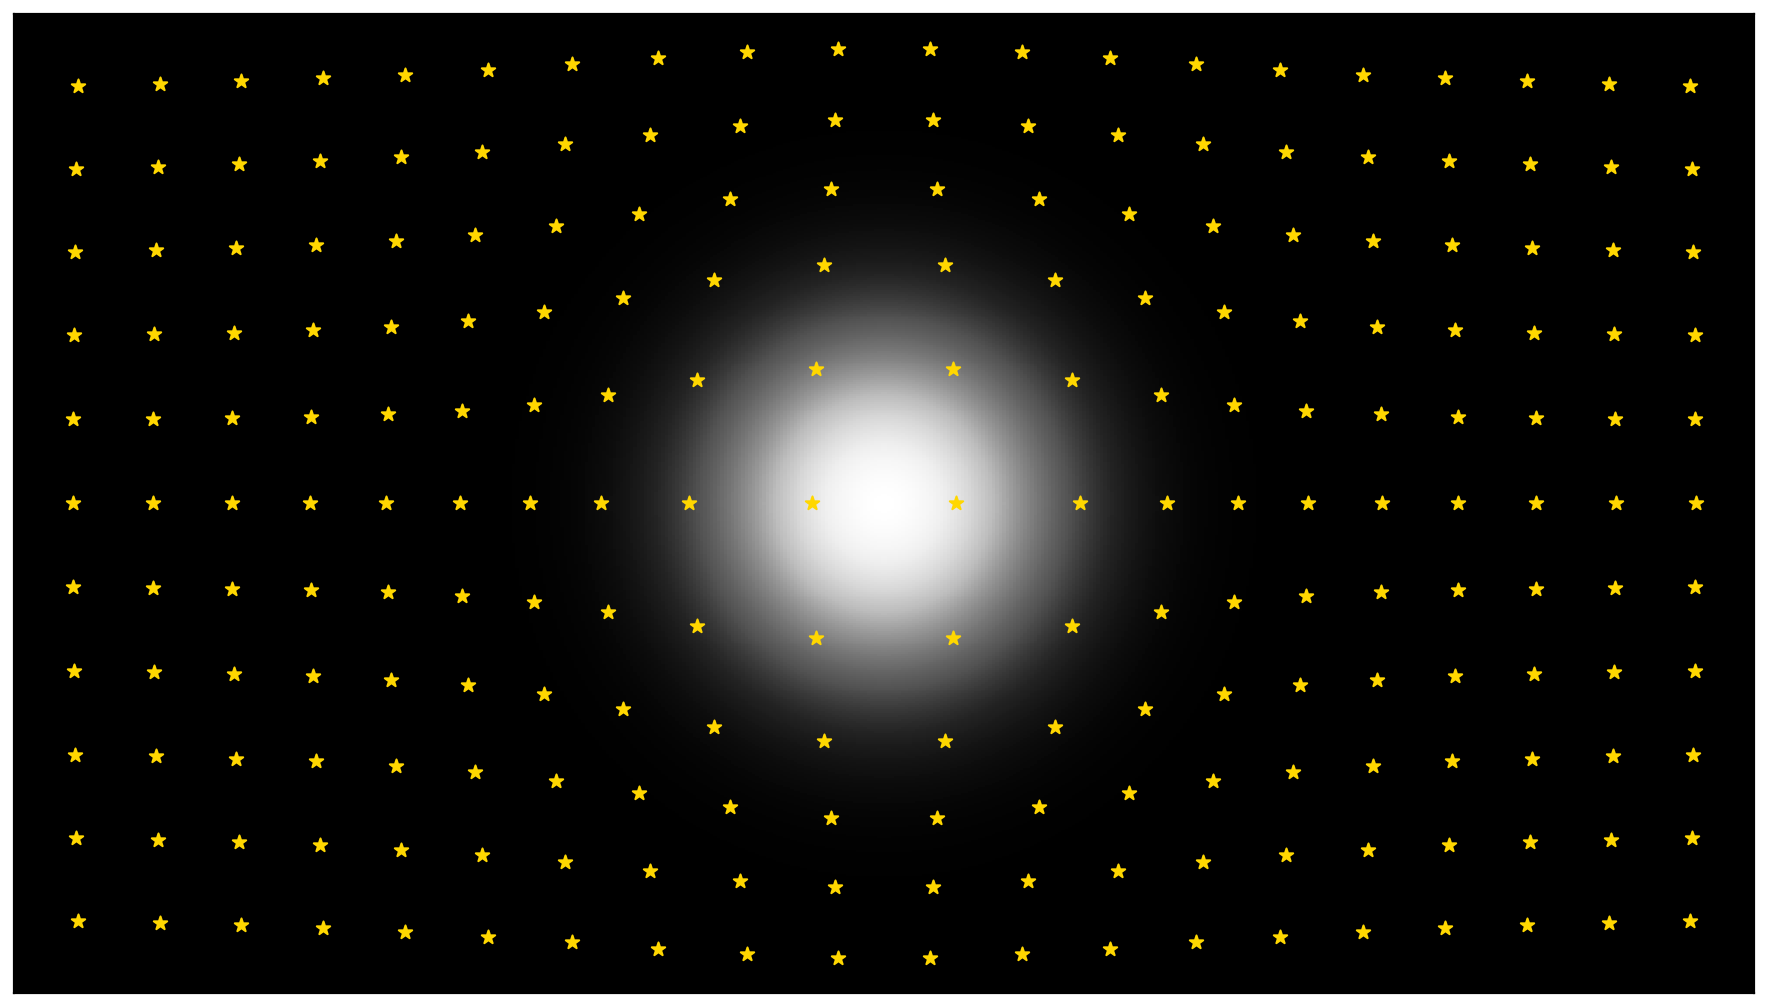

In [451]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9] ,
            n_dens = 50,
            source_pos="uniform"
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'gold','s':50}


anim = ds.animation(dt=10, 
                    pos_l=np.array([[-0,0],[.5,.5]]), v_l=np.array([[50,0],[50,-100]]) * Kmps, R_l=[0.1 * pc, 0.05 *pc], M_l=[8e5 * M_s, 0 * M_s],
                    D_l=100 * kpc, frames=500, mult=2000, animate=False, show_lens=True, show_vel_arrows=False, show_orig=False,
                   n_x=500, n_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs)
# HTML(anim.to_html5_video())
plt.savefig("/Users/smsharma/Desktop/uniform_lens.pdf")


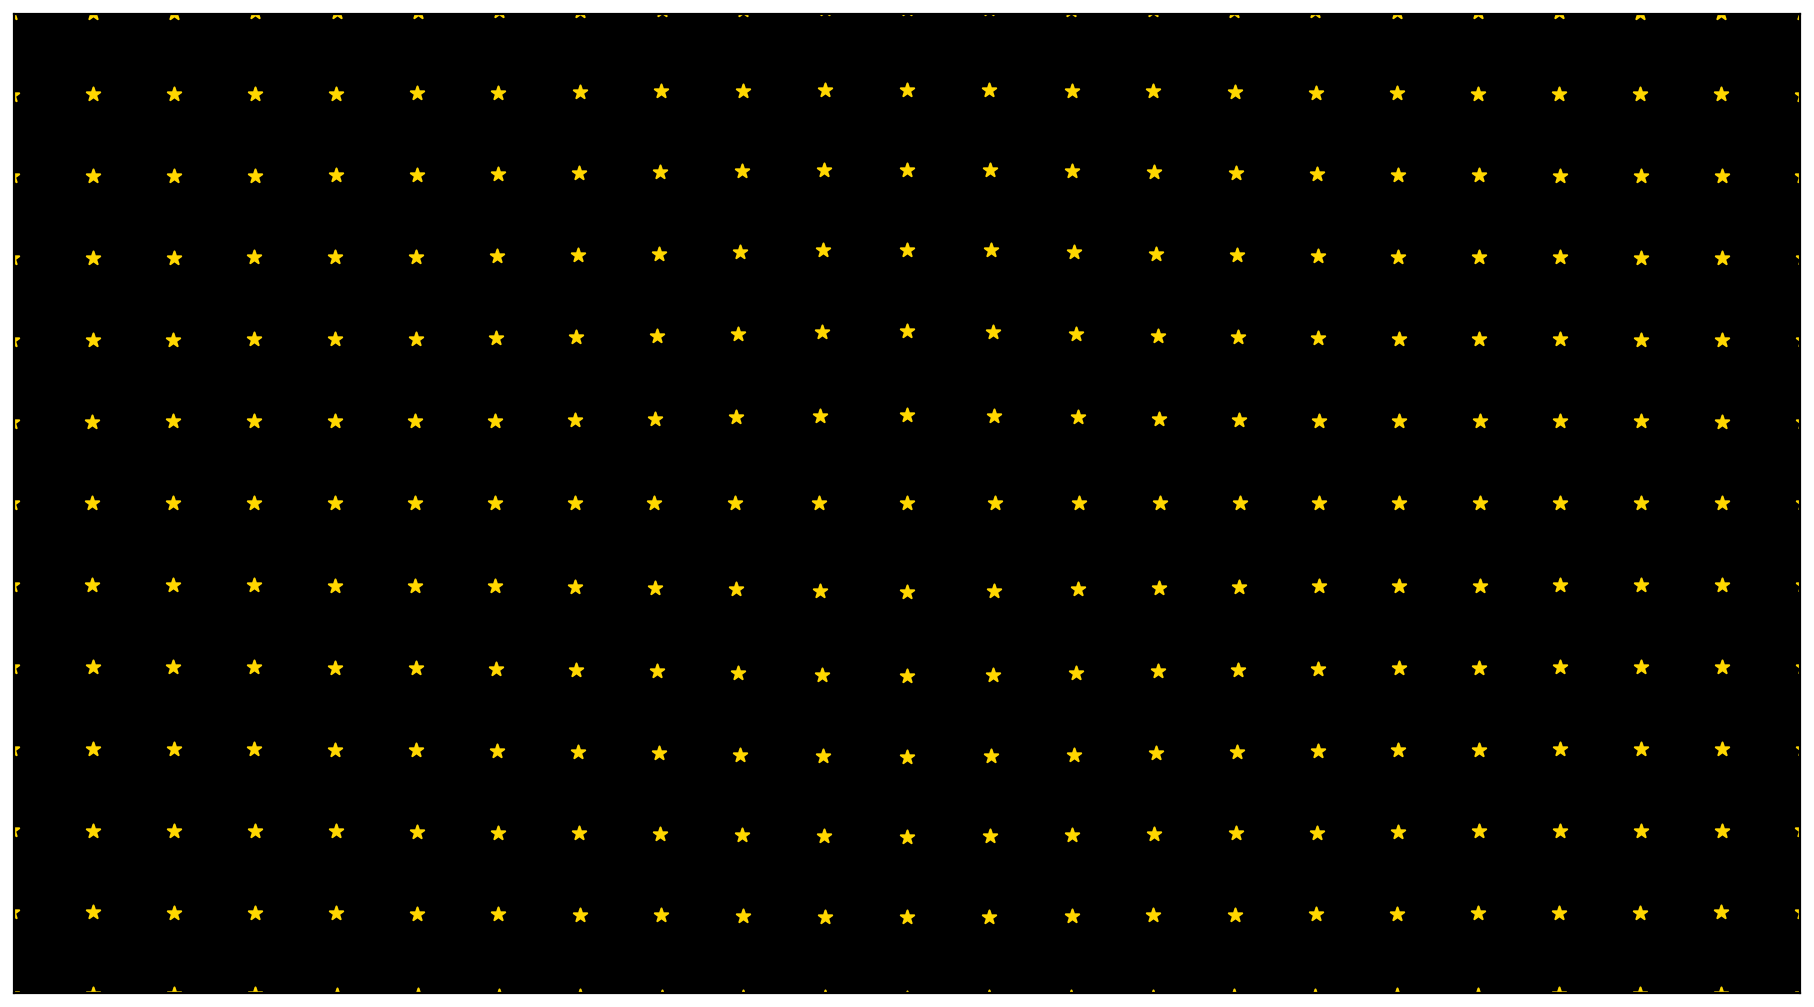

In [458]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9] ,
            n_dens = 50,
            source_pos="uniform"
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'gold','s':50}


anim = ds.animation(dt=10, 
                    pos_l=np.array([[-0,0],[.5,.5]]), v_l=np.array([[50,0],[50,-100]]) * Kmps, R_l=[0.1 * pc, 0.05 *pc], M_l=[1e5 * M_s, 0 * M_s],
                    D_l=100 * kpc, frames=500, mult=2000, animate=False, show_lens=False, show_vel_arrows=False, show_orig=False,
                   n_x=500, n_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs)
# HTML(anim.to_html5_video())
plt.savefig("/Users/smsharma/Desktop/uniform_lens_nolens.pdf")


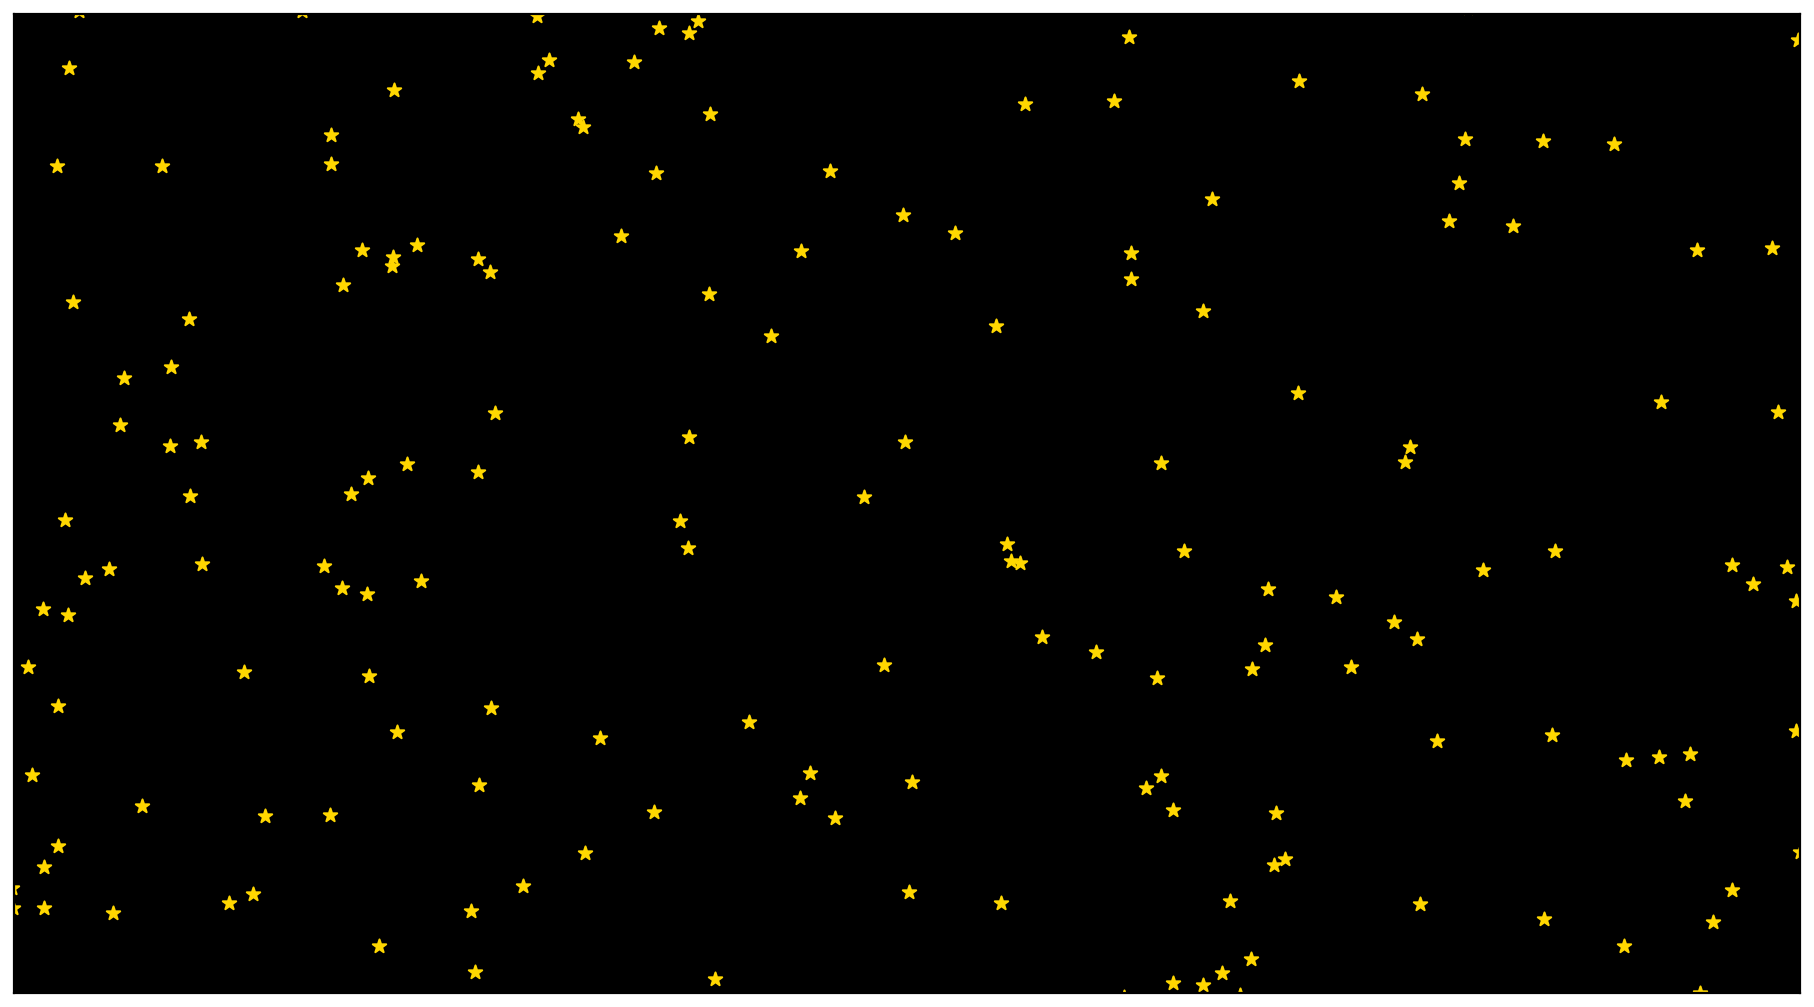

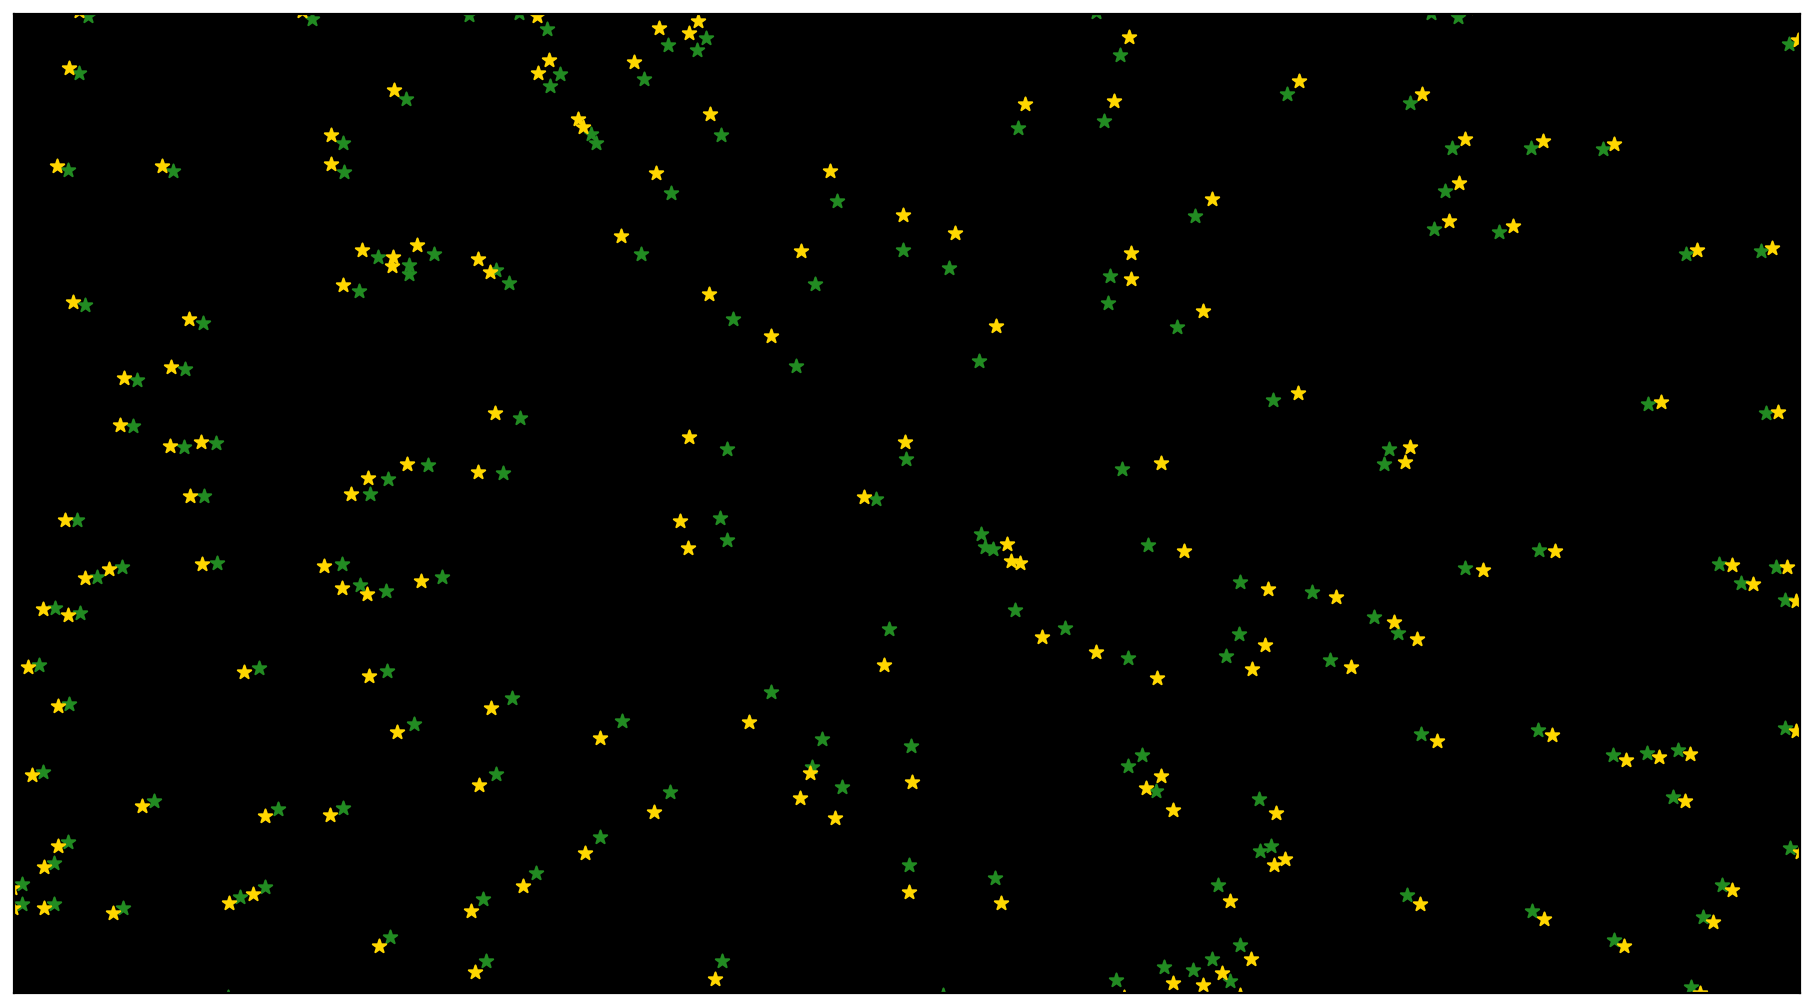

In [463]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9] ,
            n_dens = 50,
            source_pos="random"
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'gold','s':50}
star_orig_kwargs={'marker':'*', 'color':'forestgreen','s':50}


anim = ds.animation(dt=10, 
                    pos_l=np.array([[-0,0],[.5,.5]]), v_l=np.array([[50,0],[50,-100]]) * Kmps, R_l=[0.1 * pc, 0.05 *pc], M_l=[4e5 * M_s, 0 * M_s],
                    D_l=100 * kpc, frames=500, mult=2000, animate=False, show_lens=False, show_vel_arrows=False, show_orig=False, show_sources=True,
                   n_x=500, n_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs)
# HTML(anim.to_html5_video())
plt.savefig("/Users/smsharma/Desktop/random.pdf")

anim = ds.animation(dt=10, 
                    pos_l=np.array([[-0,0],[.5,.5]]), v_l=np.array([[50,0],[50,-100]]) * Kmps, R_l=[0.1 * pc, 0.05 *pc], M_l=[4e5 * M_s, 0 * M_s],
                    D_l=100 * kpc, frames=500, mult=2000, animate=False, show_lens=False, show_vel_arrows=False, show_orig=True, show_sources=True,
                   n_x=500, n_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs)
# HTML(anim.to_html5_video())
plt.savefig("/Users/smsharma/Desktop/random_orig.pdf")


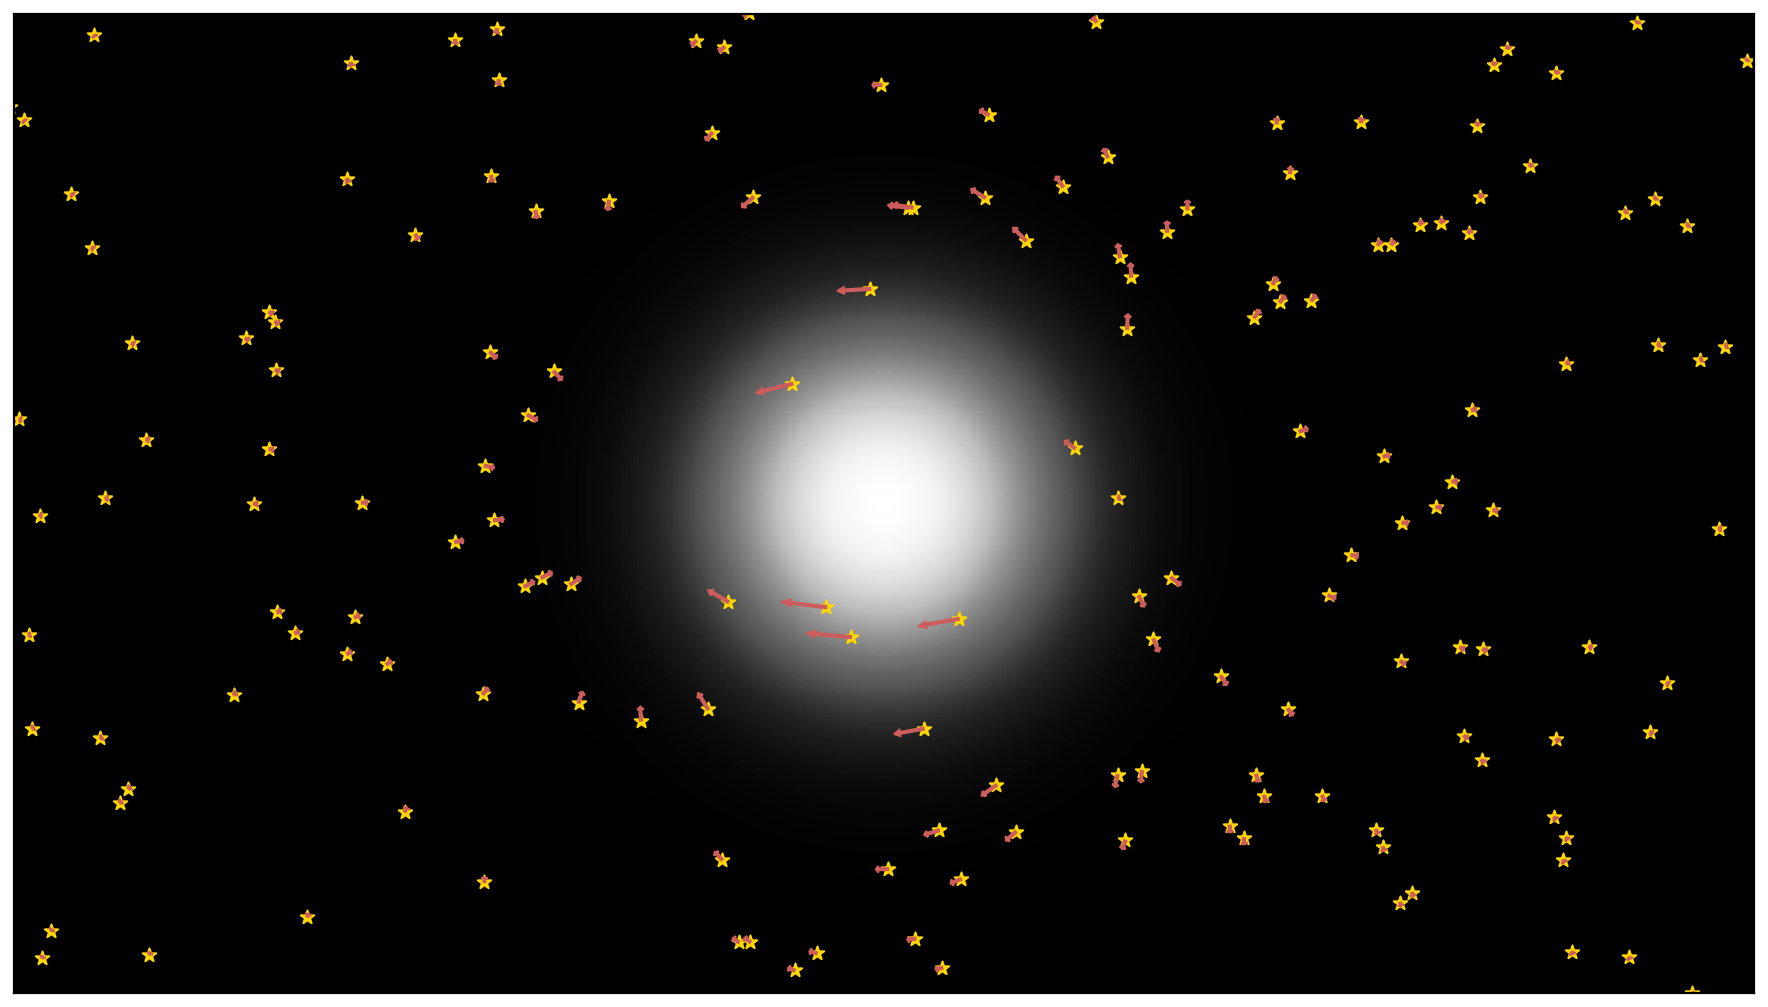

In [486]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9] ,
            n_dens = 50,
            source_pos="random"
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'gold','s':50}
star_orig_kwargs={'marker':'*', 'color':'forestgreen','s':50}

anim = ds.animation(dt=10, 
                    pos_l=np.array([[0.,0]]), v_l=np.array([[50,0]]) * Kmps, R_l=[0.1 * pc], M_l=[5e5 * M_s],
                    D_l=100 * kpc, frames=1000, mult=2000, animate=False, show_lens=True, show_vel_arrows=True, show_orig=False, show_sources=True,
                   n_x=500, n_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs)

plt.savefig("/Users/smsharma/Desktop/velocity_random.pdf")


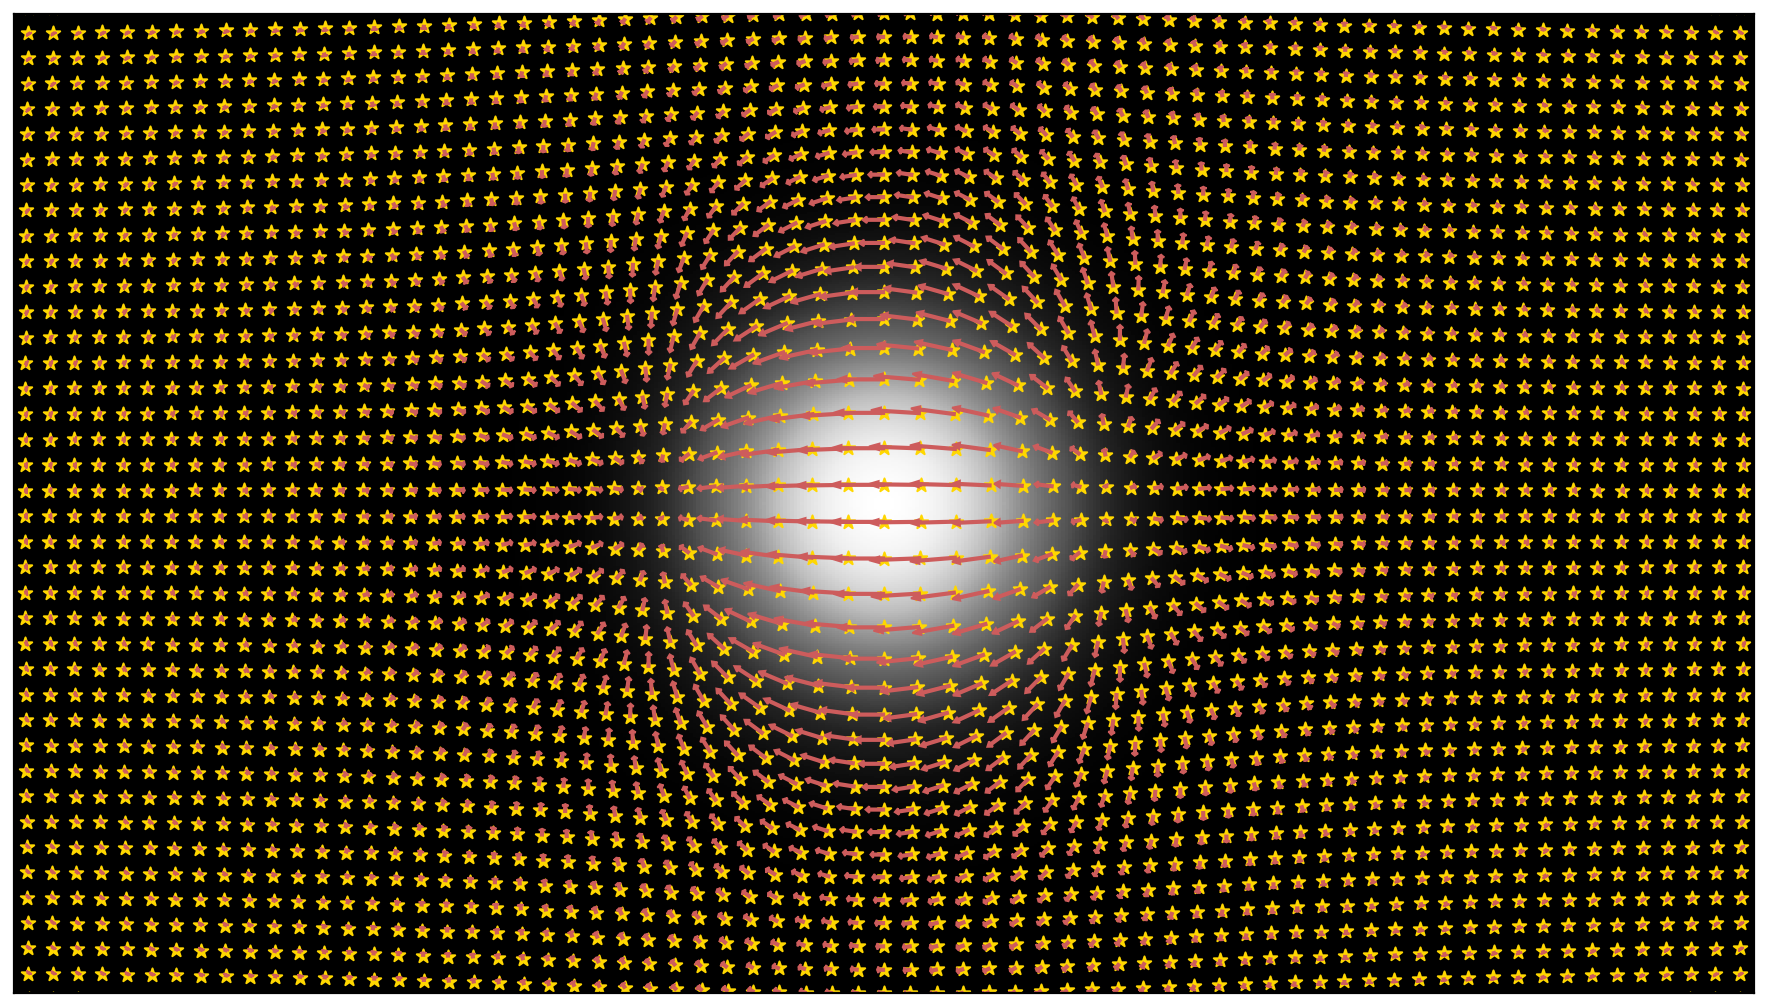

In [487]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9] ,
            n_dens = 500,
            source_pos="uniform"
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'gold','s':50}
star_orig_kwargs={'marker':'*', 'color':'forestgreen','s':50}

anim = ds.animation(dt=10, 
                    pos_l=np.array([[0.,0]]), v_l=np.array([[50,0]]) * Kmps, R_l=[0.1 * pc], M_l=[5e5 * M_s],
                    D_l=100 * kpc, frames=1000, mult=2000, animate=False, show_lens=True, show_vel_arrows=True, show_orig=False, show_sources=True,
                   n_x=500, n_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs)

plt.savefig("/Users/smsharma/Desktop/velocity_dipole.pdf")

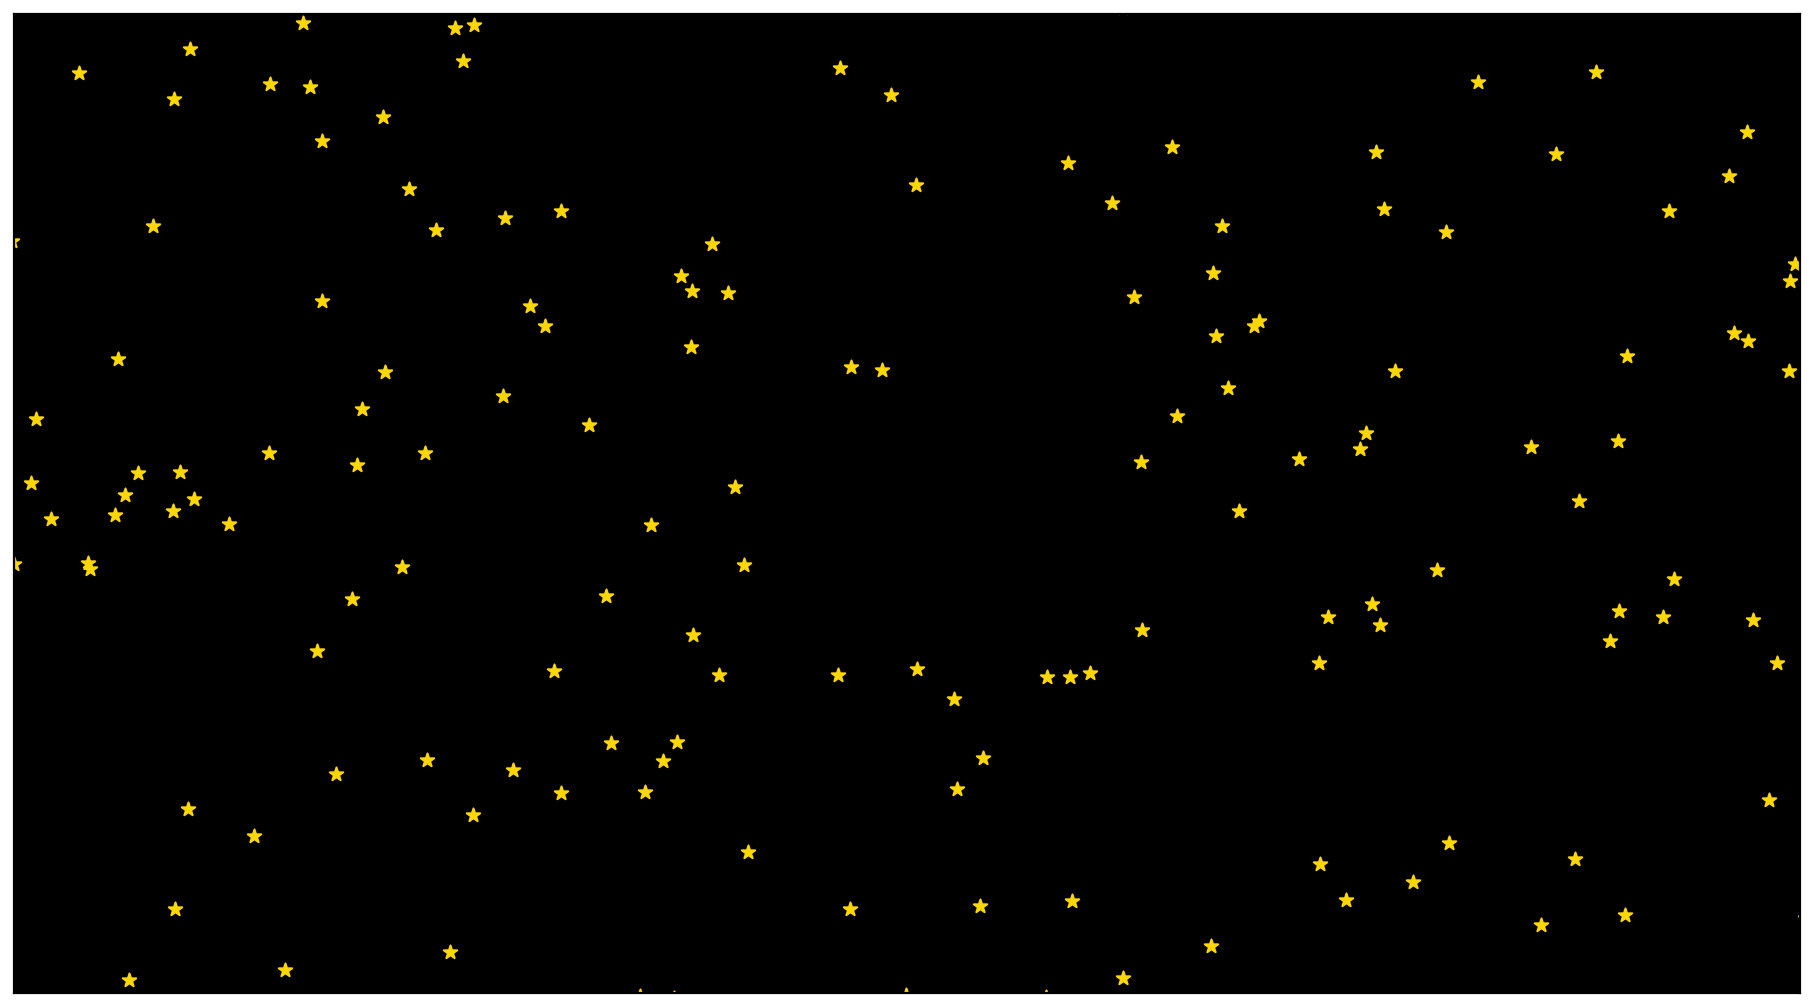

In [468]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9] ,
            n_dens = 50,
            source_pos="random"
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'gold','s':50}
star_orig_kwargs={'marker':'*', 'color':'forestgreen','s':50}

anim = ds.animation(dt=10, 
                    pos_l=np.array([[-1.,0]]), v_l=np.array([[50,0]]) * Kmps, R_l=[0.03 * pc], M_l=[5e5 * M_s],
                    D_l=100 * kpc, frames=1000, mult=2000, animate=True, show_lens=False, show_vel_arrows=False, show_orig=False, show_sources=True,
                   n_x=500, n_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs)

# HTML(anim.to_html5_video())
anim.save('/Users/smsharma/Desktop/hidden_lens.mp4')

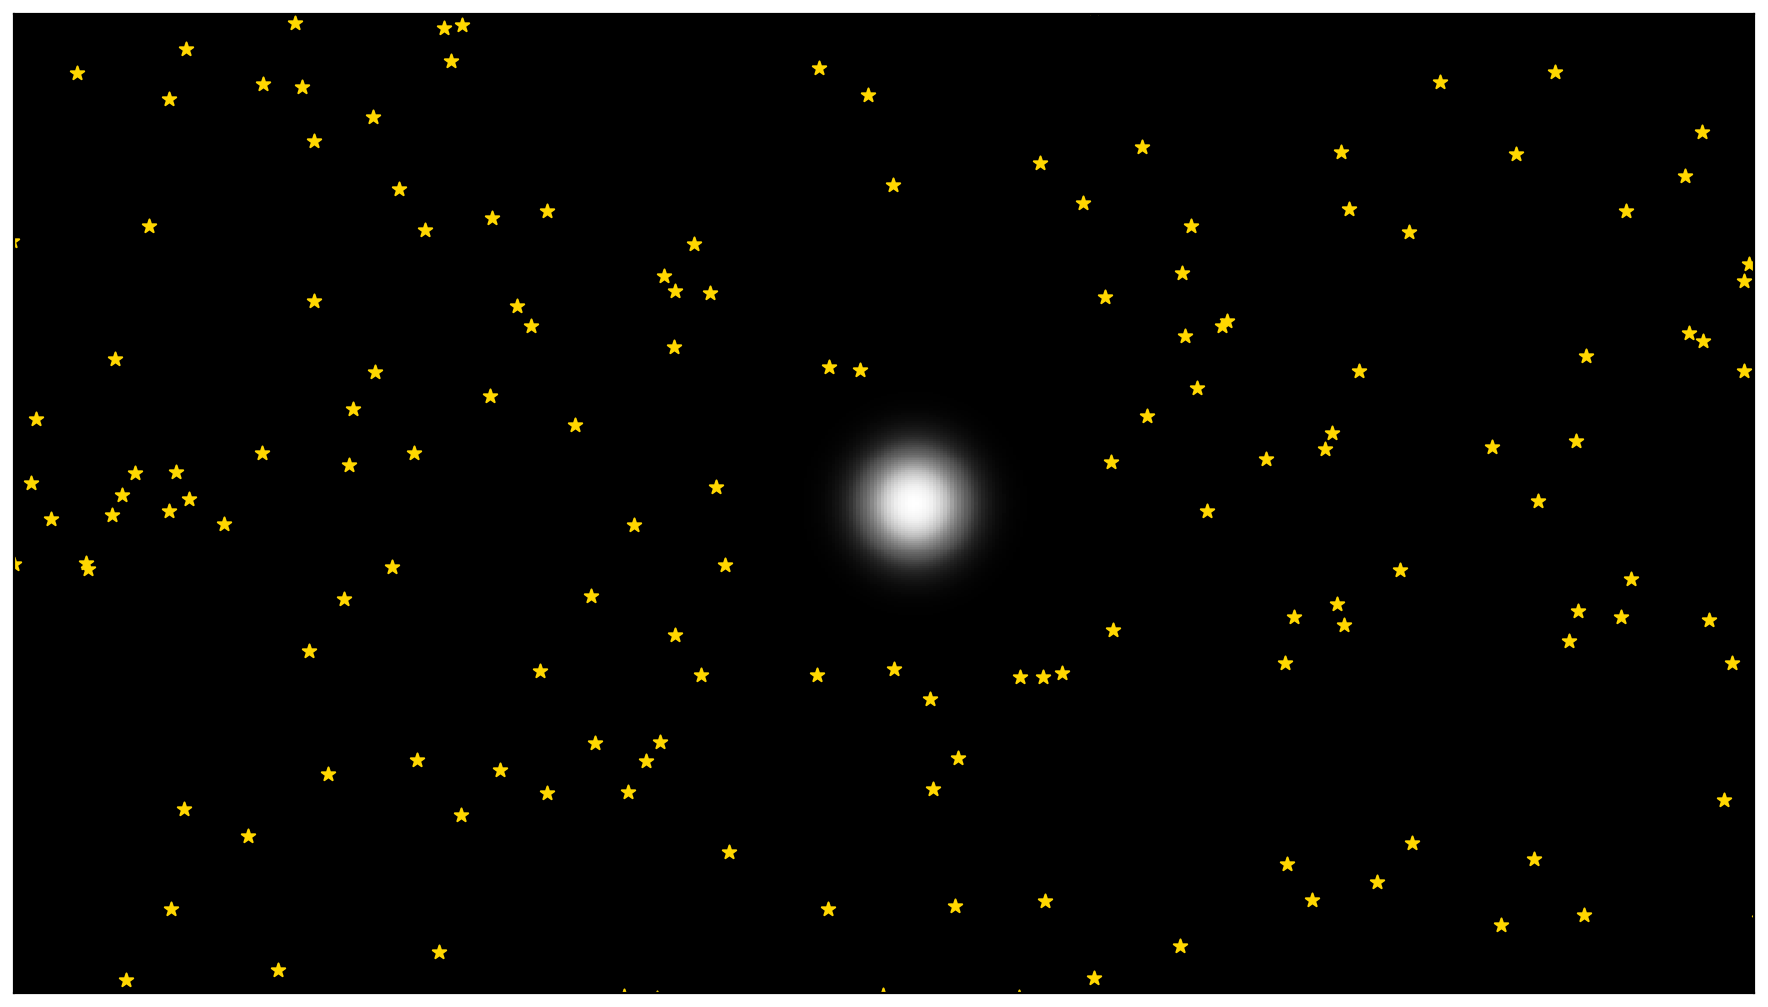

In [469]:
anim = ds.animation(dt=10, 
                    pos_l=np.array([[-1.,0]]), v_l=np.array([[50,0]]) * Kmps, R_l=[0.03 * pc], M_l=[5e5 * M_s],
                    D_l=100 * kpc, frames=1000, mult=2000, animate=True, show_lens=True, show_vel_arrows=False, show_orig=False, show_sources=True,
                   n_x=500, n_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs)

# HTML(anim.to_html5_video())
anim.save('/Users/smsharma/Desktop/nonhidden_lens.mp4')

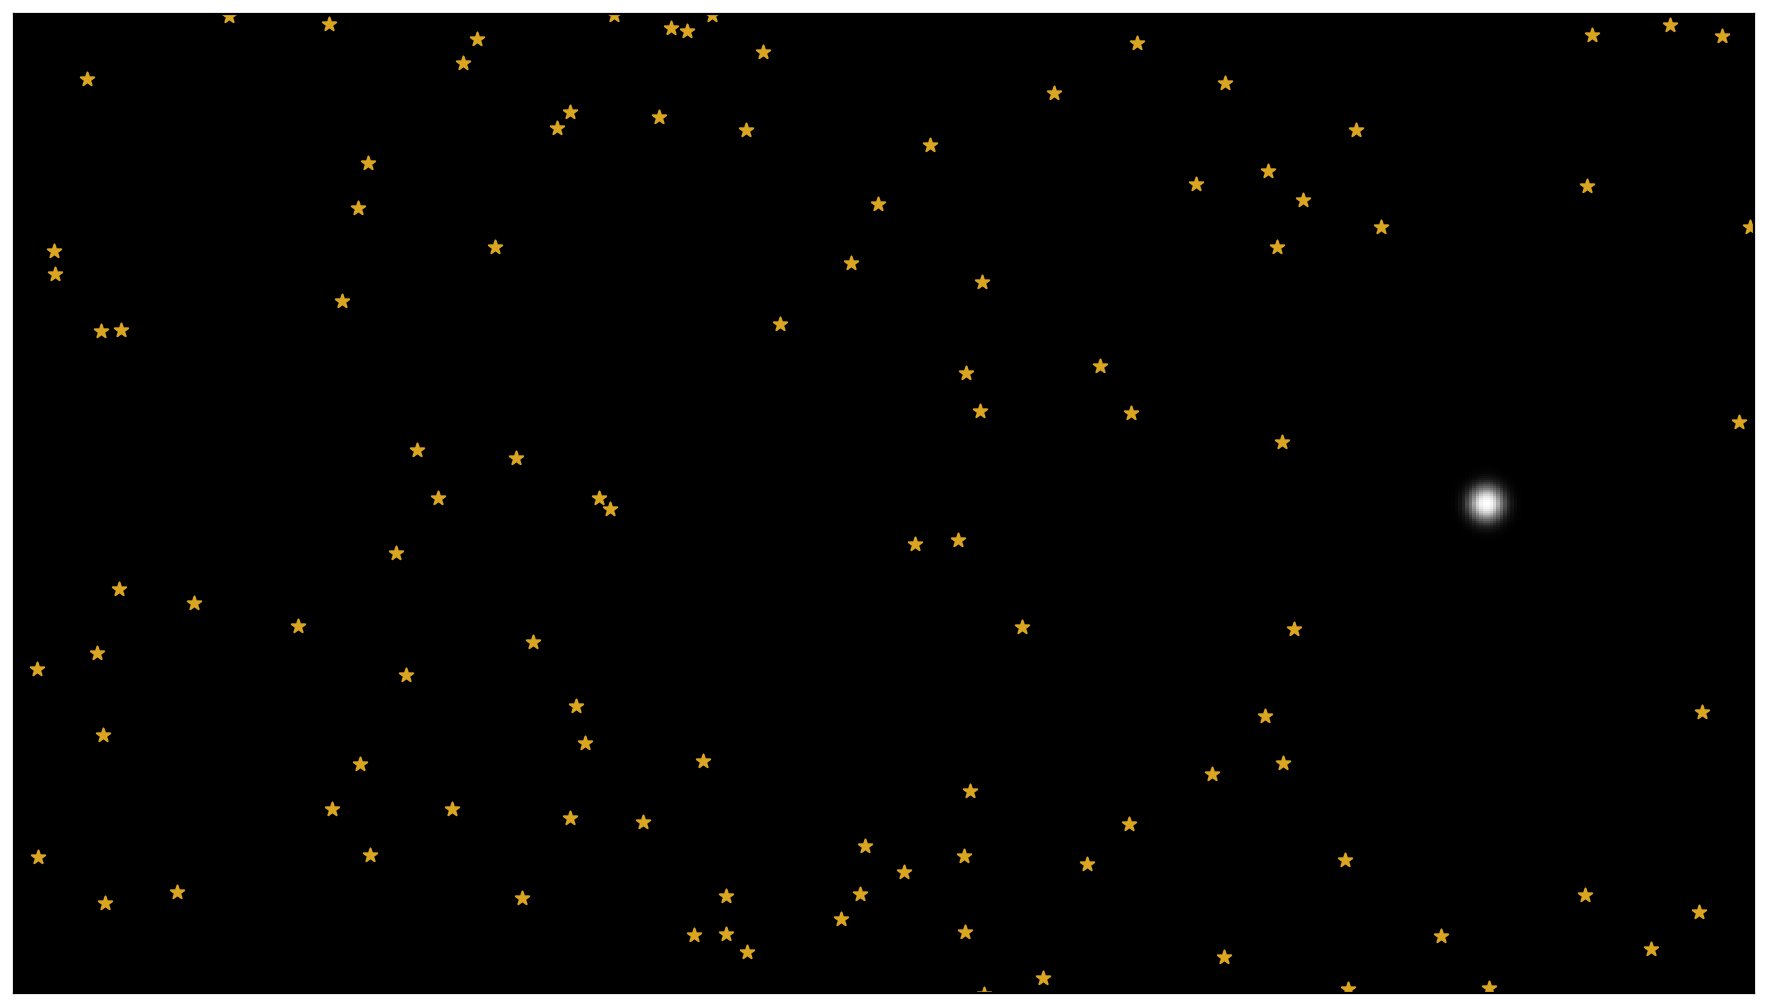

In [650]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9] ,
            n_dens = 25,
            source_pos="random",
            custom_source_pos=np.array([[-0.8,0.01], [-0.5,0.01], [-0.48,-0.01]])
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'goldenrod','s':50}
star_orig_kwargs={'marker':'*', 'color':'forestgreen','s':50}

anim = ds.animation(dt=10, 
                    pos_l=np.array([[-1.,0]]), v_l=np.array([[50,0]]) * Kmps, R_l=[0.01 * pc], M_l=[5e5 * M_s],
                    D_l=100 * kpc, frames=2000, mult=2000, animate=True, show_lens=True, show_vel_arrows=False, show_orig=False, show_sources=True,
                   n_x=500, n_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs)

# HTML(anim.to_html5_video())
anim.save('/Users/smsharma/Desktop/blips.mp4')

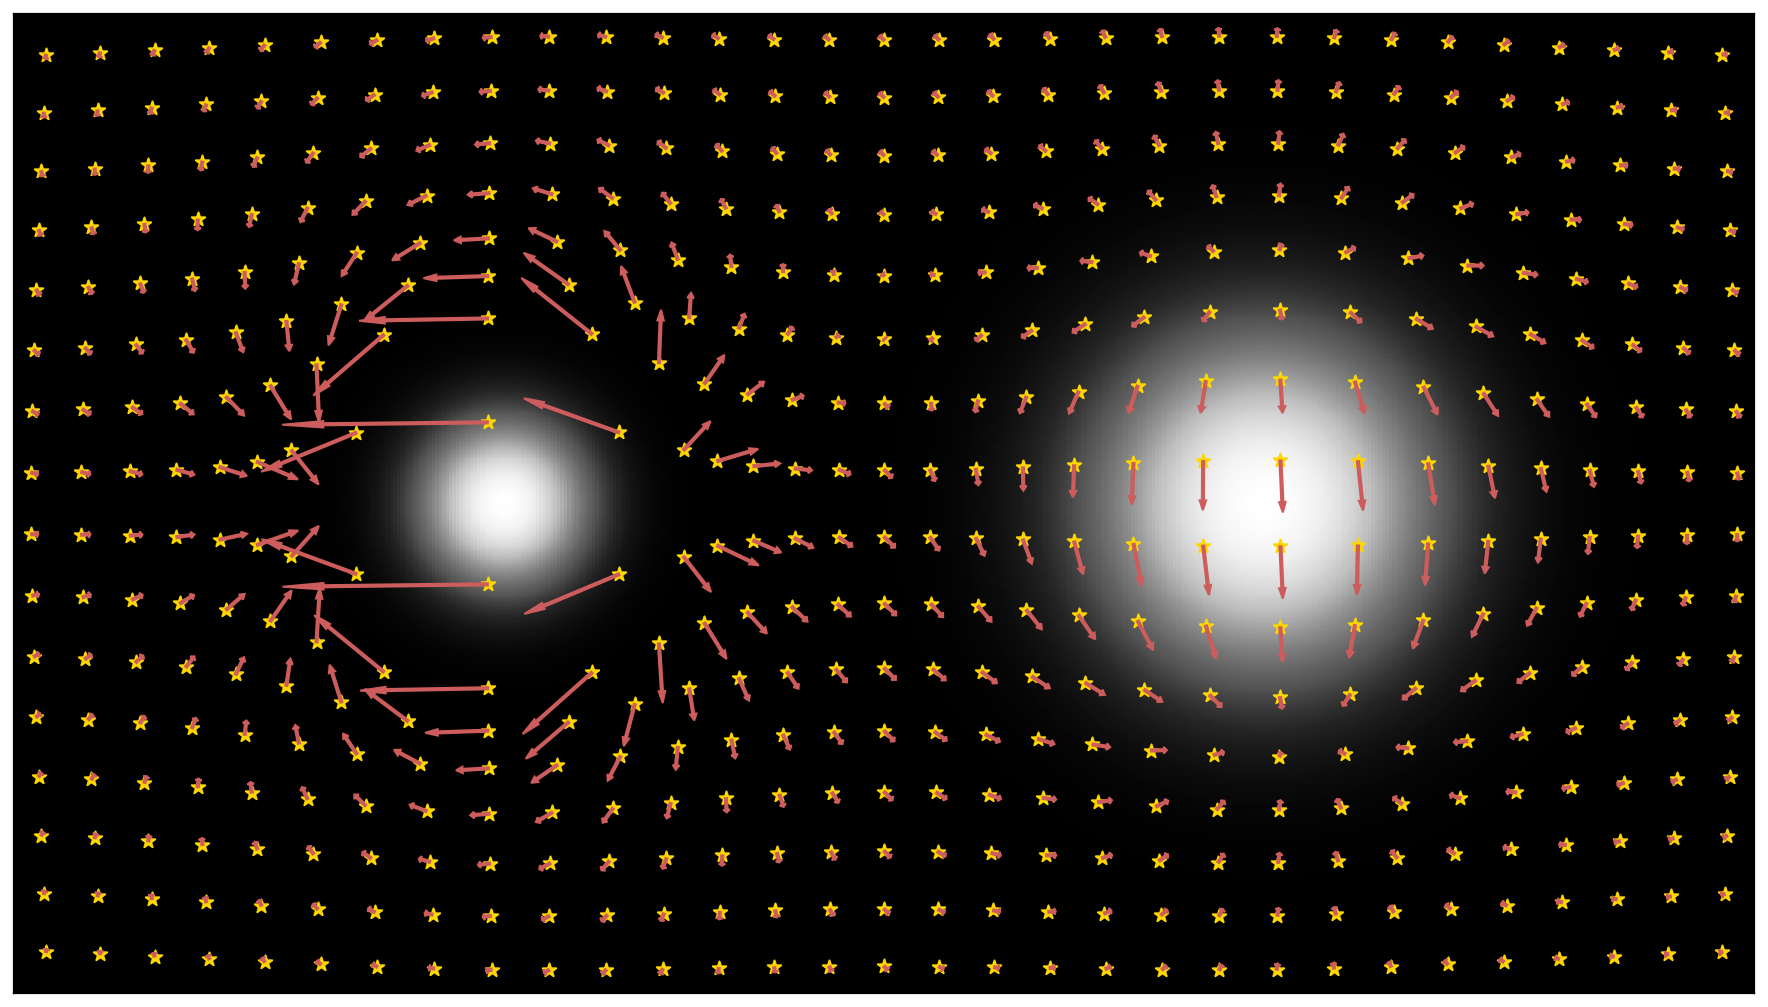

In [516]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9] ,
            n_dens = 100,
            source_pos="uniform"
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'gold','s':50}
star_orig_kwargs={'marker':'*', 'color':'forestgreen','s':50}

anim = ds.animation(dt=10, 
                    pos_l=np.array([[-0.7,0],[0.7,0]]), v_l=np.array([[50,0],[0,50]]) * Kmps, R_l=[0.05 * pc,0.1 * pc], M_l=[5e5 * M_s,5e5 * M_s],
                    D_l=100 * kpc, frames=1000, mult=2000, animate=False, show_lens=True, show_vel_arrows=True, show_orig=False, show_sources=True,
                   n_x=500, n_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs)

plt.savefig("/Users/smsharma/Desktop/size.pdf")

In [ ]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9] ,
            n_dens = 100,
            source_pos="uniform"
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'gold','s':50}
star_orig_kwargs={'marker':'*', 'color':'forestgreen','s':50}

anim = ds.animation(dt=10, 
                    pos_l=np.array([[-0.7,0],[0.7,0]]), v_l=np.array([[50,0],[0,50]]) * Kmps, R_l=[0.05 * pc,0.1 * pc], M_l=[5e5 * M_s,5e5 * M_s],
                    D_l=100 * kpc, frames=1000, mult=2000, animate=False, show_lens=True, show_vel_arrows=True, show_orig=False, show_sources=True,
                   n_x=500, n_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs)

# plt.savefig("/Users/smsharma/Desktop/size.pdf")

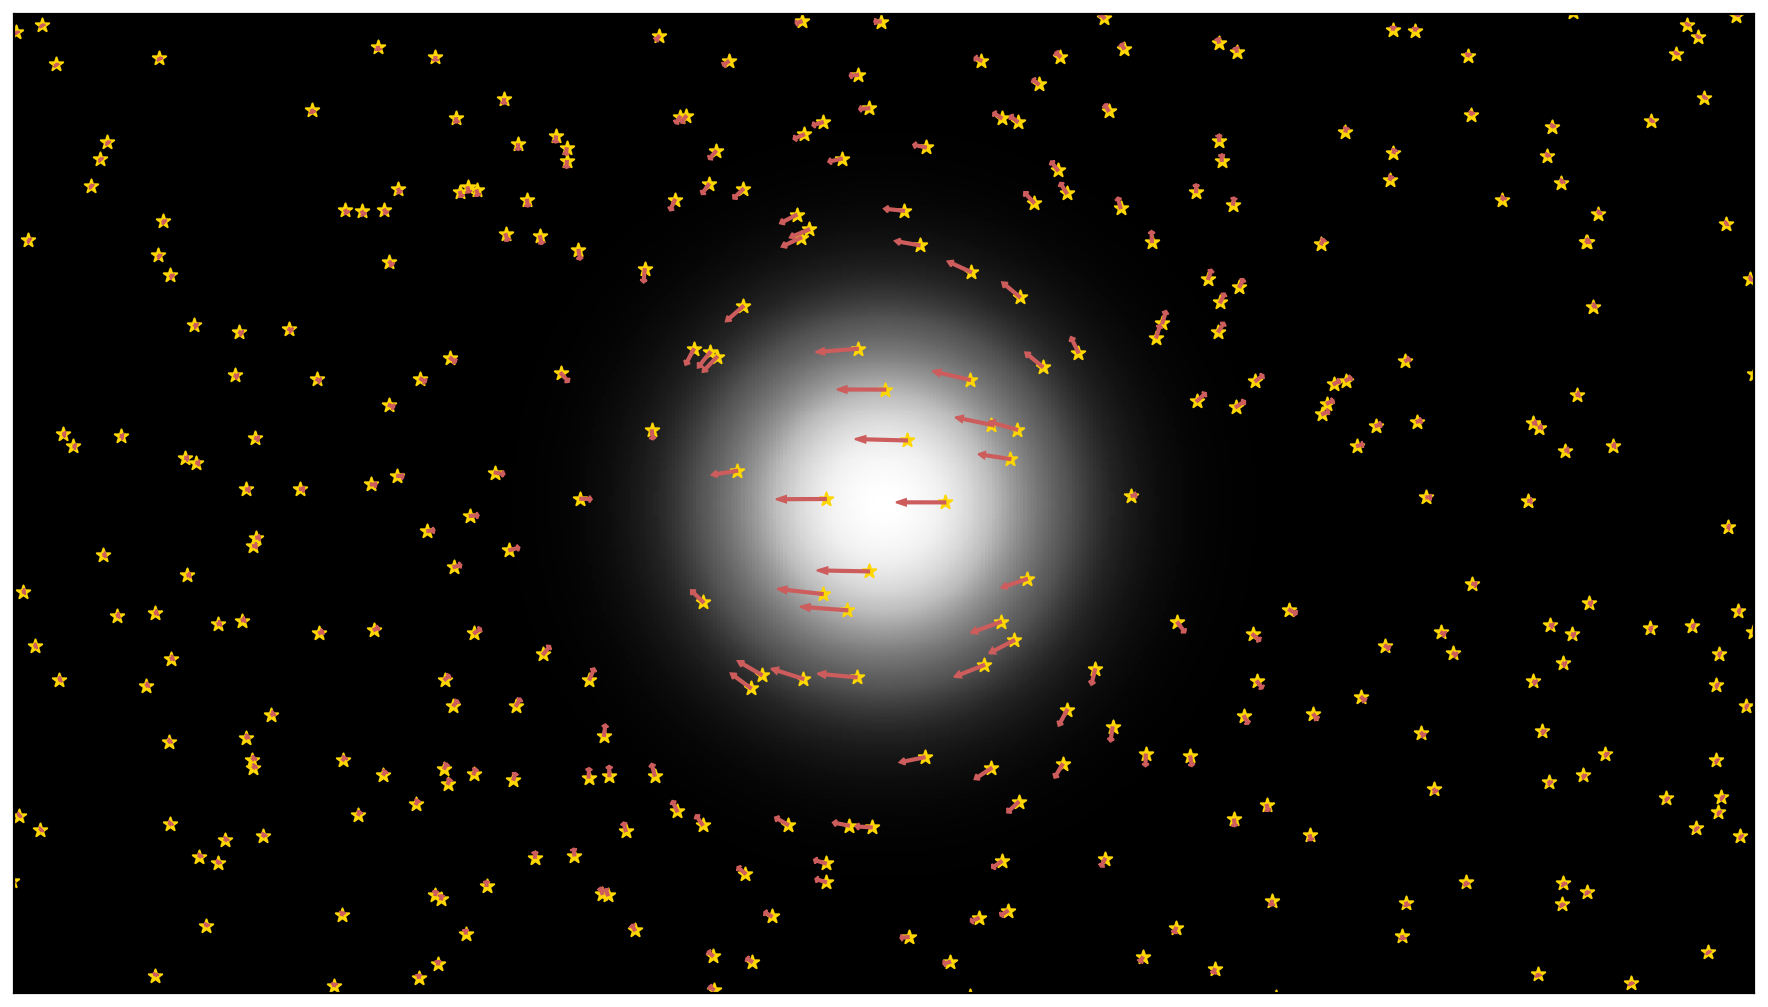

In [520]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9] ,
            n_dens = 100,
            source_pos="random"
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'gold','s':50}
star_orig_kwargs={'marker':'*', 'color':'forestgreen','s':50}

anim = ds.animation(dt=10, 
                    pos_l=np.array([[0,0]]), v_l=np.array([[50,0]]) * Kmps, R_l=[0.1 * pc], M_l=[5e5 * M_s],
                    D_l=100 * kpc, frames=1000, mult=2000, animate=False, show_lens=True, show_vel_arrows=True, show_orig=False, show_sources=True,
                   n_x=500, n_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs)

plt.savefig("/Users/smsharma/Desktop/templates.pdf")

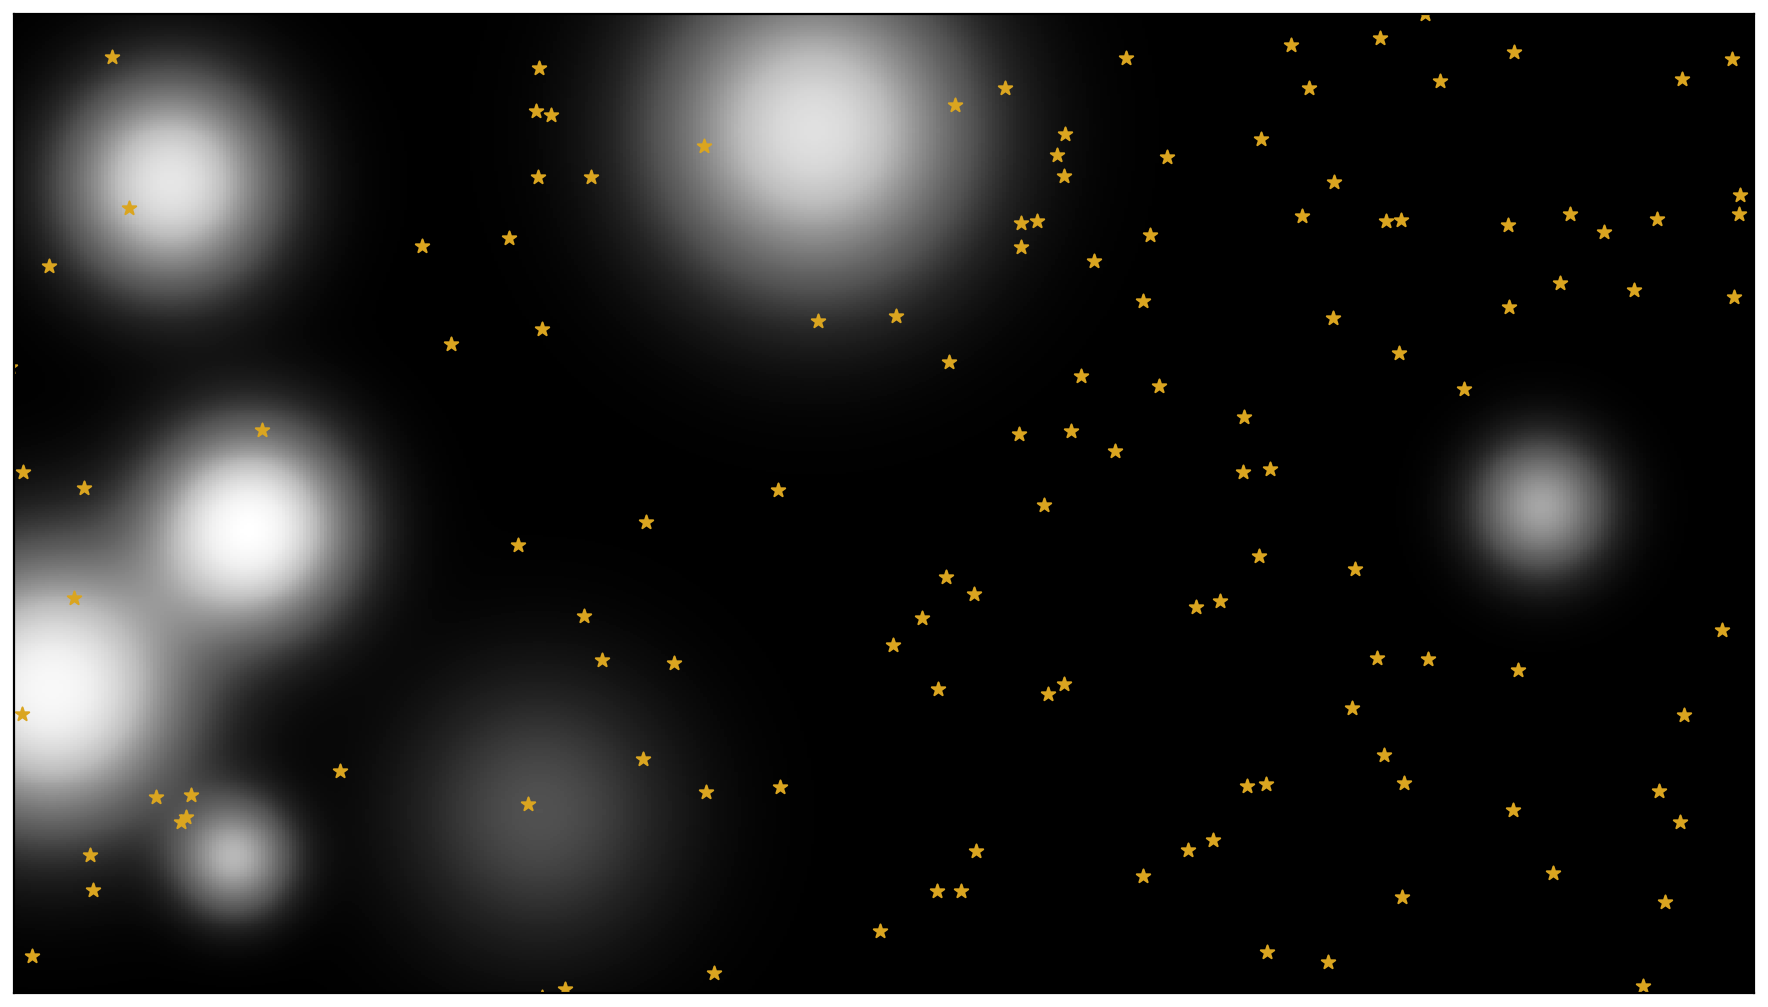

In [648]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9] ,
            n_dens = 50,
            source_pos="random"
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'goldenrod','s':50}
star_orig_kwargs={'marker':'*', 'color':'forestgreen','s':50}

n_lens = 7

pos_l_ary = np.transpose([np.random.uniform(-1.6, 1.6, n_lens), np.random.uniform(-0.9, 0.9, n_lens)])
v_l_ary = np.transpose([np.random.normal(0, 150, n_lens), np.random.normal(0, 150, n_lens)]) * Kmps
R_l_ary = np.random.uniform(0, 0.1, n_lens) * pc
M_l_ary = 10 ** np.random.uniform(5, 6, n_lens) * M_s

anim = ds.animation(dt=10, 
                    pos_l=pos_l_ary, v_l=v_l_ary, R_l=R_l_ary, M_l=M_l_ary,
                    D_l=100 * kpc, frames=1000, mult=2000, animate=False, show_lens=True, show_vel_arrows=False, show_orig=False, show_sources=True,
                   n_x=500, n_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs)

# plt.savefig("/Users/smsharma/Desktop/correlations.pdf")

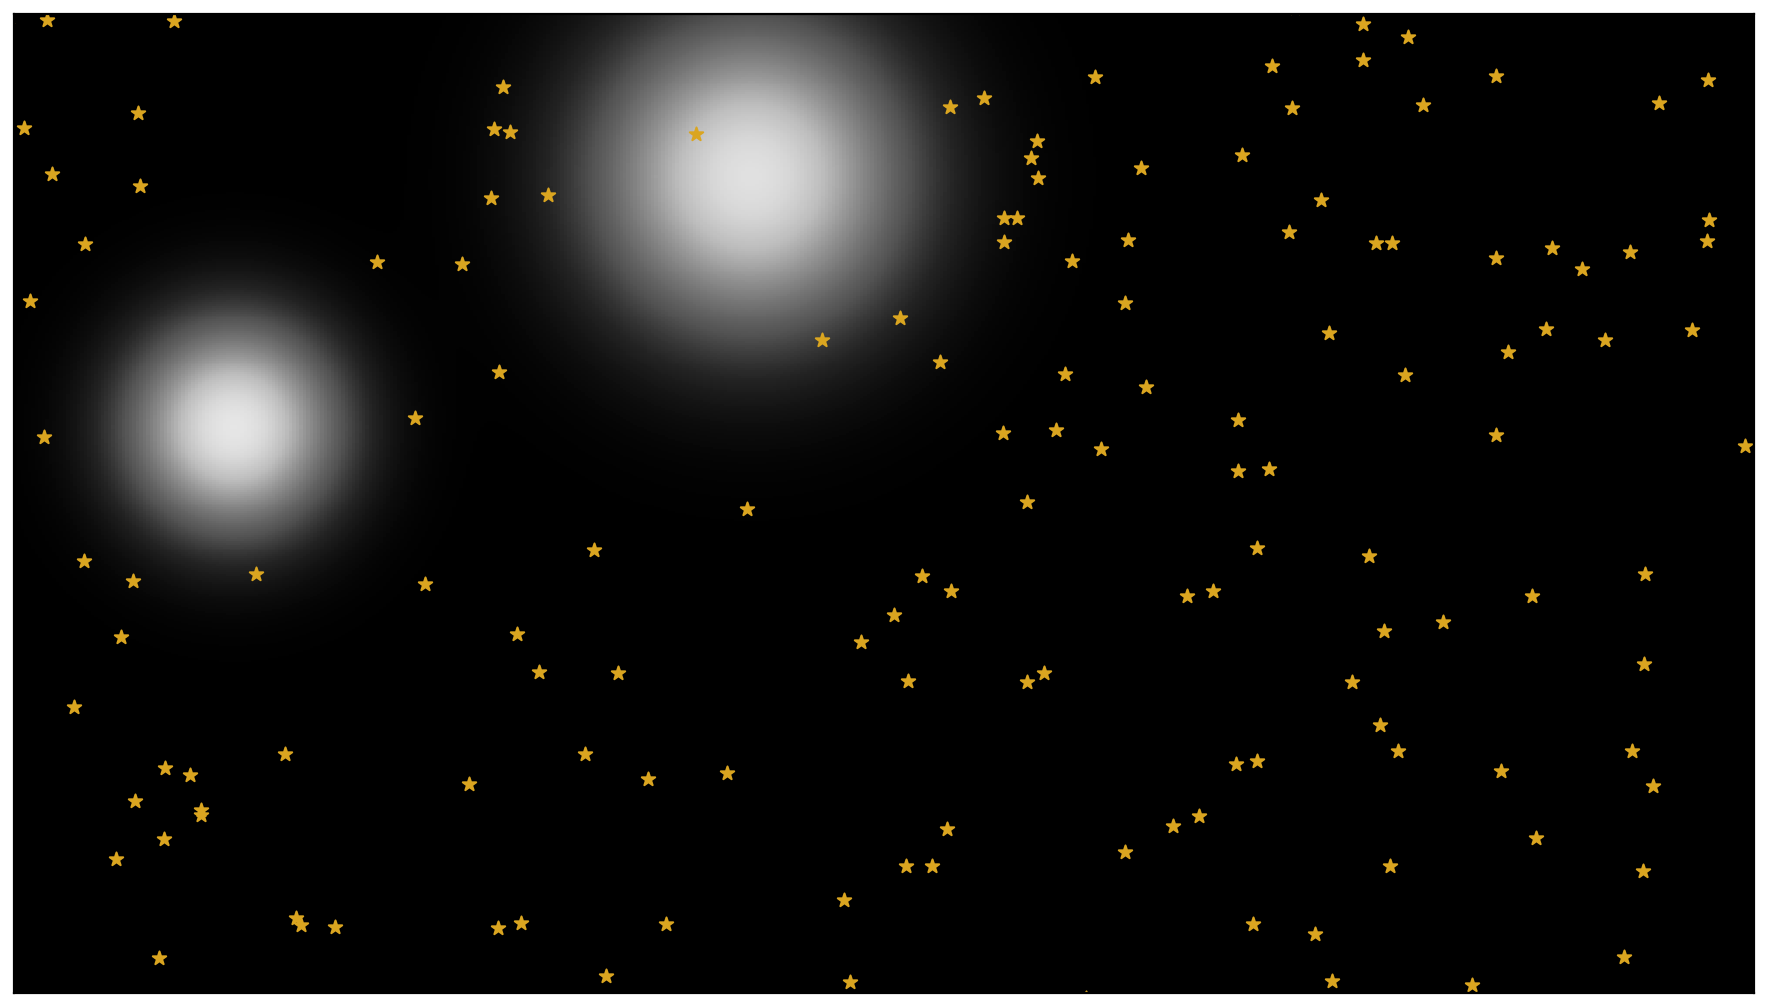

In [649]:
anim = ds.animation(dt=10, 
                    pos_l=pos_l_ary, v_l=v_l_ary, R_l=R_l_ary, M_l=M_l_ary,
                    D_l=100 * kpc, frames=2000, mult=.1, animate=True, show_lens=True, show_vel_arrows=False, show_orig=False, show_sources=True,
                   n_x=500, n_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs)

anim.save('/Users/smsharma/Desktop/correlations.mp4')

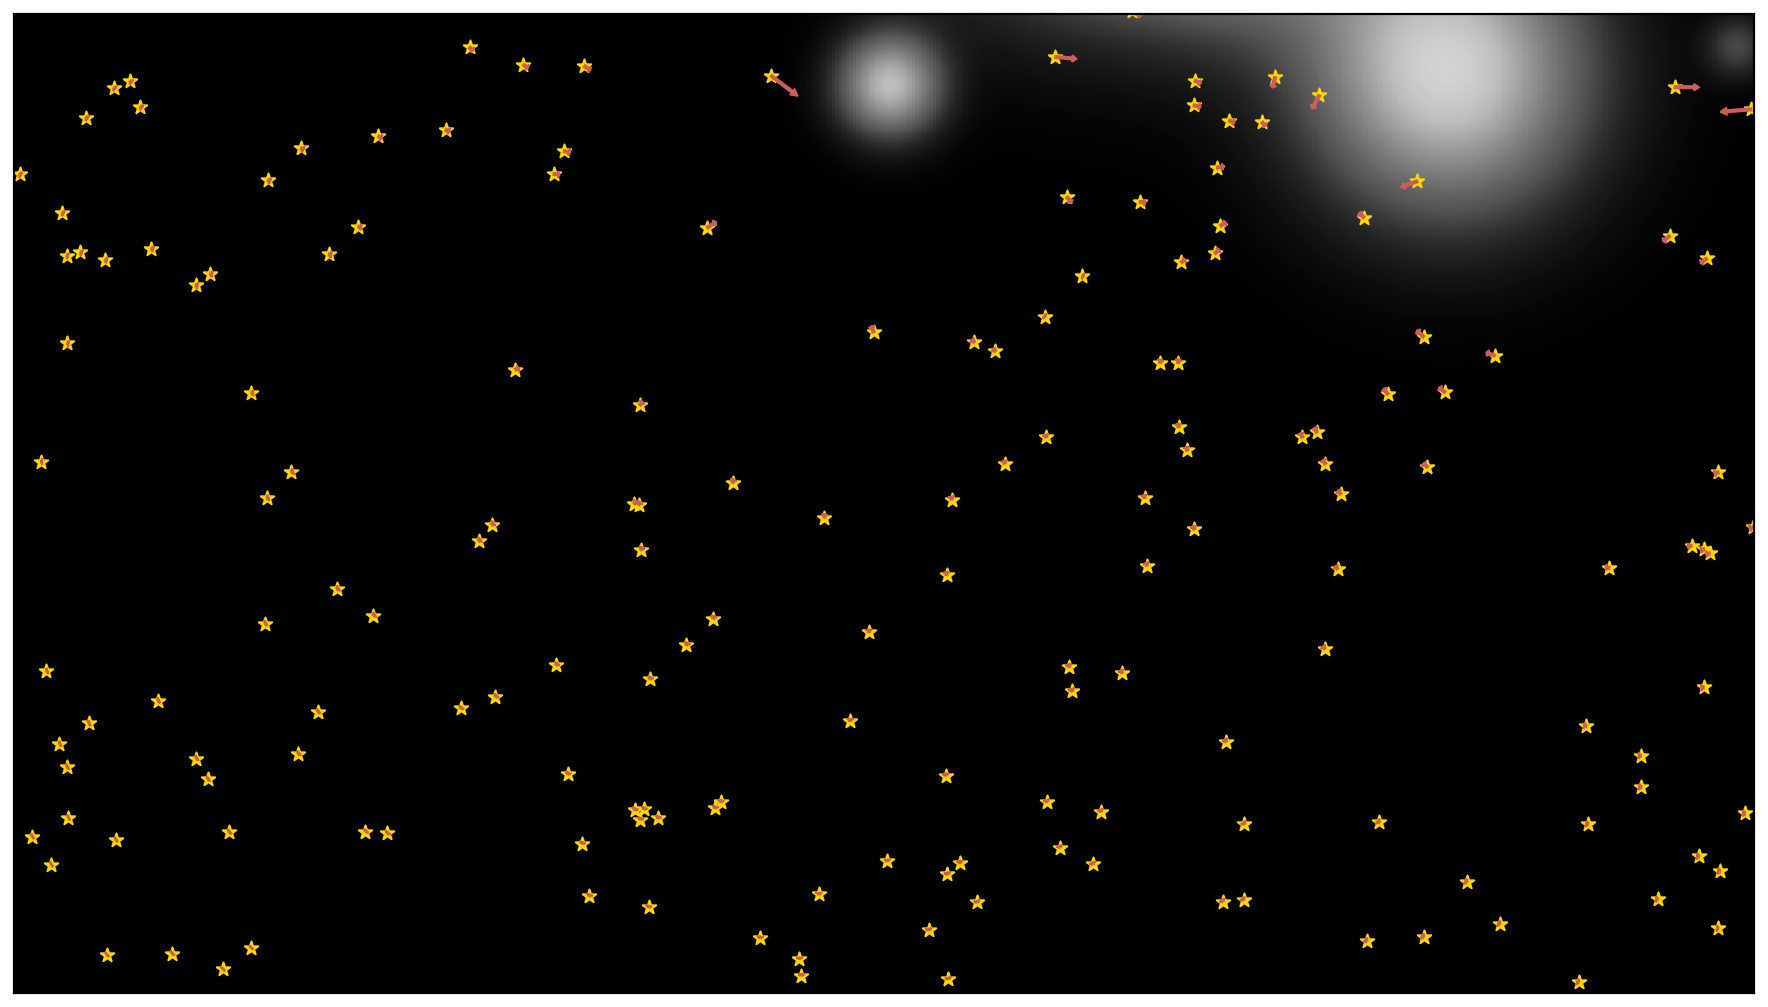

In [605]:
anim = ds.animation(dt=10, 
                    pos_l=pos_l_ary, v_l=v_l_ary, R_l=R_l_ary, M_l=M_l_ary,
                    D_l=100 * kpc, frames=1000, mult=1000, animate=True, show_lens=True, show_vel_arrows=True, show_orig=False, show_sources=True,
                   n_x=500, n_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs)

anim.save('/Users/smsharma/Desktop/correlations.mp4')

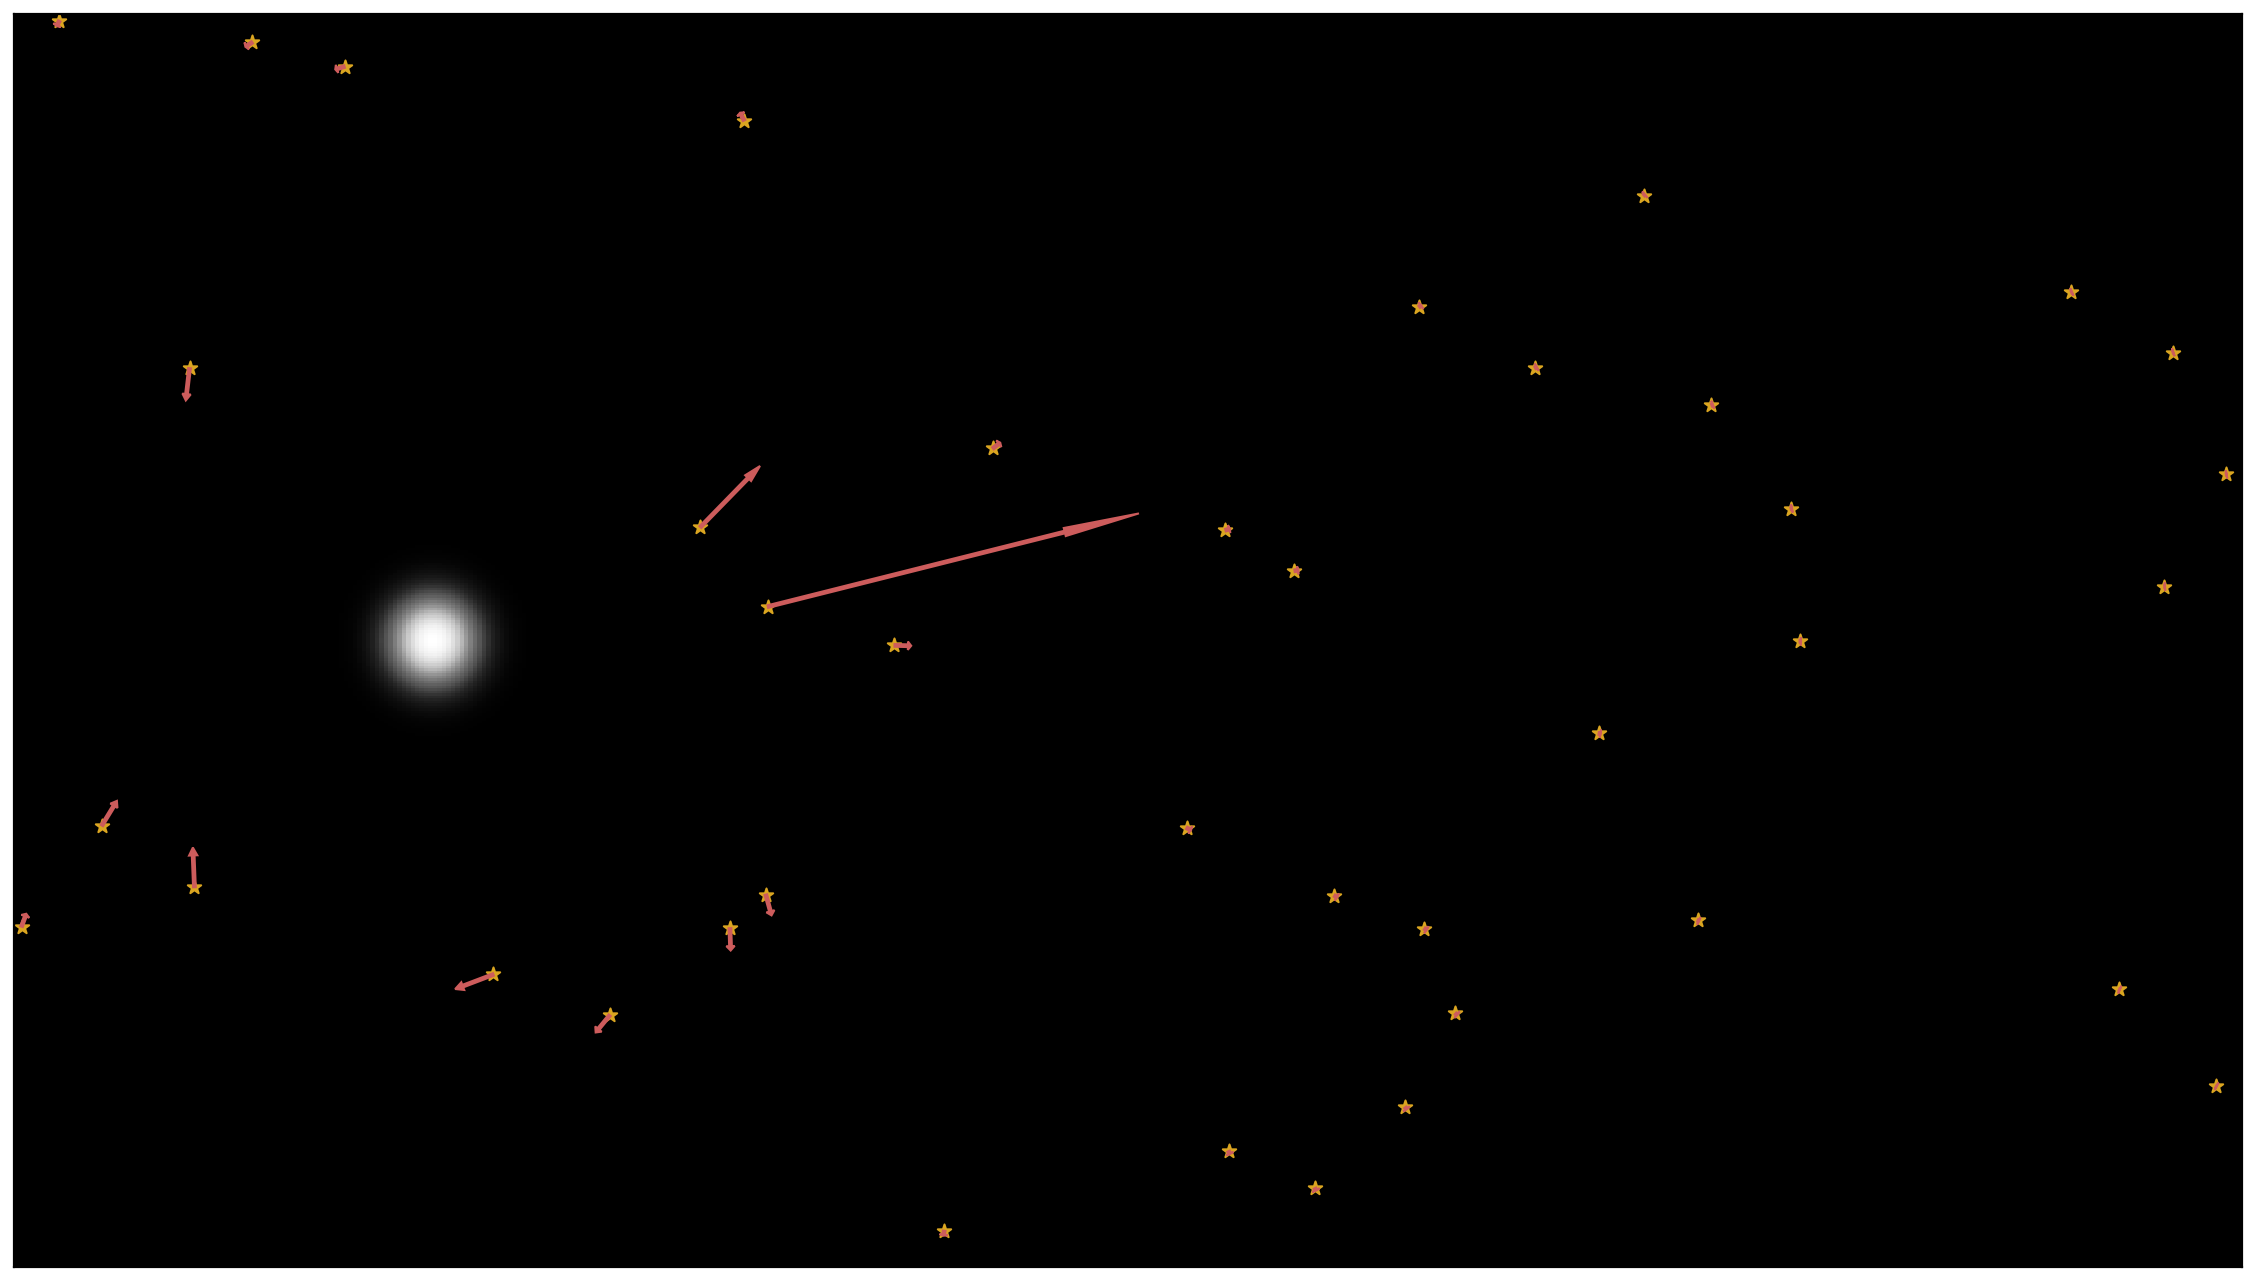

In [663]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9] ,
            n_dens = 10,
            source_pos="random",
            custom_source_pos=np.array([[-0.9,0.01]])
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'goldenrod','s':50}
star_orig_kwargs={'marker':'*', 'color':'forestgreen','s':50}

anim = ds.animation(dt=10, 
                    pos_l=np.array([[-1.,0]]), v_l=np.array([[50,0]]) * Kmps, R_l=[0.02 * pc], M_l=[5e5 * M_s],
                    D_l=100 * kpc, frames=2000, mult=2000, animate=False, show_lens=True, show_vel_arrows=True, show_orig=False, show_sources=True,
                   n_x=500, n_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs)

plt.tight_layout()
plt.savefig("/Users/smsharma/Desktop/outlier.pdf")
